In [1]:
import re
import datetime
import pandas as pd
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

def get_year(title):
    search = re.findall("\(\d{4}\)", title) if isinstance(title, str) else []
    return (len(search) > 0 and search[len(search) - 1][1:-1]) or datetime.datetime.now().year

# cria nova coluna com ano do filme
# filmes['ano'] = filmes.apply(lambda row: get_year(row['titulo']), axis=1)

filmes

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [2]:
# extrai os generios e cria novas colunas para cada genero
generos = filmes.generos.str.get_dummies()
# concatena o dataframe original com o novo dataframe dos generos
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
#remove coluna antiga dos generos
dados_dos_filmes = dados_dos_filmes.drop(['generos'], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler

# reescalando generos dos filmes
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [4]:
from sklearn.cluster import KMeans

# agrupando os filmes em 3 clusters
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [1 1 2 ... 2 1 2]



# como o kmeans funciona?

[naftaliharris](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

1. Definir centróides aleatoriamente no plano
2. Calcular a distância entre os centróides
3. Os pontos que se encontram na primeira metade entre os centróides são de uma classe e os da segunda metade são de outra classe

4. Enquanto os centróides forem deslocados ou os pontos forem pintados de outra cor, faça:
    1. Otimize a distância do centróide para os pontos da sua classe (buscar se deslocar para o centro daquela classe)
    2. Recalcule as distâncias para os outros centróides e as suas novas fronteiras
    3. Pinte cada ponto de acordo com a nova fronteira que ele ocupa



In [5]:
print(generos.columns)

# valores de cada cluster para cada genero
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.63853704  0.0946175  -0.23147076 -0.26737169 -0.55214962
   0.58567401 -0.21562083 -0.11517895 -0.12312995  0.25155362  0.49493256
   0.11736889 -0.1798885   0.49878851 -0.33569222  0.50412188  1.32567708
  -0.11605256 -0.0662952 ]
 [-0.05917995  0.12878381  1.10931972  1.94078854  2.11684496  0.15929761
  -0.32191099 -0.19993096 -0.59776377  1.20411866 -0.09492563 -0.27642177
   0.31182253  0.31256015 -0.13762909 -0.27269098  0.14136748 -0.47052824
  -0.1691444  -0.08992819]
 [ 0.03583176 -0.29446041 -0.24073056 -0.25256178 -0.26914339  0.20569217
  -0.19053157  0.12771574  0.15698138 -0.16539425 -0.08967044 -0.16021861
  -0.10621769  0.01989027 -0.18694774  0.19186237 -0.23965099 -0.47793348
 

In [6]:
# mostra os valores de cada clustes (0,1,2) para cada um dos generos
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.638537,0.094618,-0.231471,-0.267372,-0.552150,0.585674,-0.215621,-0.115179,-0.123130,0.251554,0.494933,0.117369,-0.179889,0.498789,-0.335692,0.504122,1.325677,-0.116053,-0.066295
1,-0.059180,0.128784,1.109320,1.940789,2.116845,0.159298,-0.321911,-0.199931,-0.597764,1.204119,-0.094926,-0.276422,0.311823,0.312560,-0.137629,-0.272691,0.141367,-0.470528,-0.169144,-0.089928
2,0.035832,-0.294460,-0.240731,-0.252562,-0.269143,0.205692,-0.190532,0.127716,0.156981,-0.165394,-0.089670,-0.160219,-0.106218,0.019890,-0.186948,0.191862,-0.239651,-0.477933,0.079865,0.044412


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

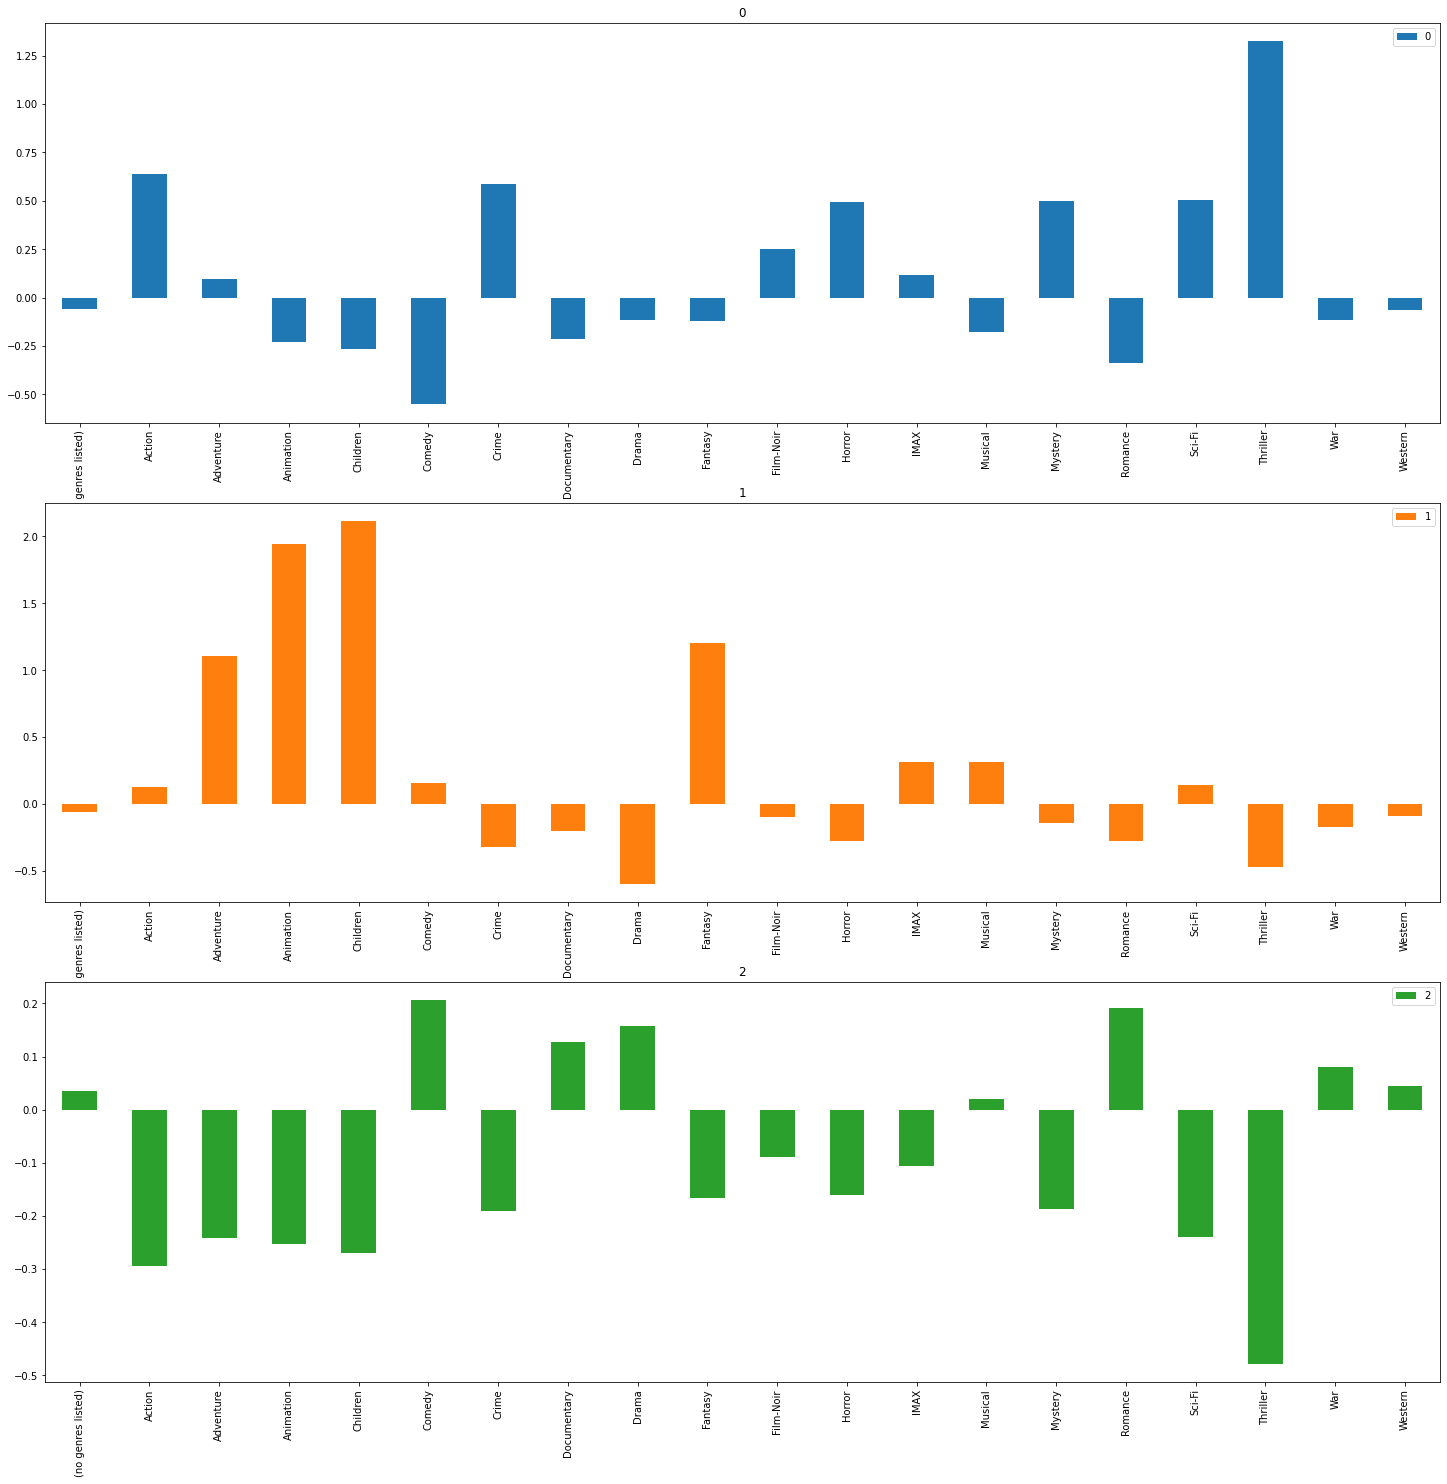

In [7]:
#plota o grafico dos grupos (usando o transpose para inverter as linhas e colunas do df) e assim mostrar 3 graficos
# 1 pra cada grupo, contendo os valores de cada genero para aquele grupo
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [8]:
print(f'clusteres dos filmes: {modelo.labels_}')
# filtra 10 exemplos de filmes do cluster 0
dados_dos_filmes[modelo.labels_ == 0].sample(10)

clusteres dos filmes: [1 1 2 ... 2 1 2]


,filme_id,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
816,1076,"Innocents, The (1961)",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5184,8410,Suddenly (1954),0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3032,4056,"Pledge, The (2001)",0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3090,4148,Hannibal (2001),0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2623,3508,"Outlaw Josey Wales, The (1976)",0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4936,7439,"Punisher, The (2004)",0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
71,79,"Juror, The (1996)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
395,454,"Firm, The (1993)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5606,27002,From the Earth to the Moon (1998),0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3301,4466,Above the Law (1988),0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#importa algoritmo de reducao TSNE
# do modulo manifold que contem alguns algoritmos para reduzir dimensionalidade
from sklearn.manifold import TSNE

# inicializa objeto TSNE
tsne = TSNE()

# chama a funcao de conhecer os dados e transformar ao mesmo tempo
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 43.78518 ,  35.861225],
       [ 22.61257 ,  52.286316],
       [  2.851136, -22.535534],
       ...,
       [ 15.815915,   4.49175 ],
       [ 27.085691,  29.202896],
       [-23.843376,  -2.213114]], dtype=float32)

<AxesSubplot:>

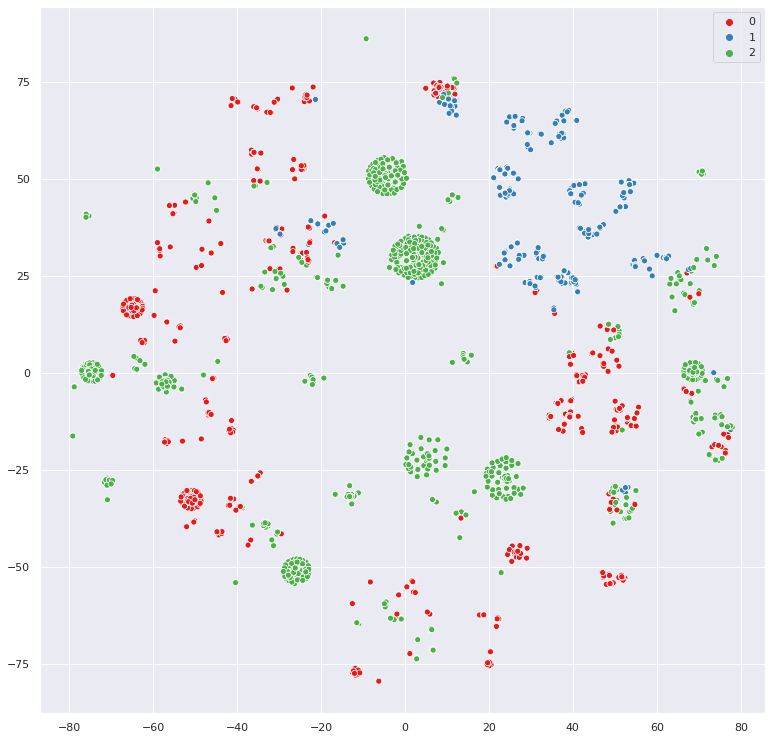

In [10]:
import seaborn as sns
# define tamanho da figura que sera plotada no grafico do seaborn
sns.set(rc={'figure.figsize': (13, 13)})


#plota o grafico usando o seaborn usando o x=a primeira coluna de todas as linhas, y=a segunda coluna de todas as linhas
#hue (cores) = labels do modelo
# paleta de cores do conjunto 1 (Set1), pegar 3 cores
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

# quando reduzimos a dimensão, perdemos alguns dados e acabamos vendo os pontos de várias cores um proximo do outro dentro de um grupo
# pois estamos visualizando em 2 dimensões. mas na verdade, originalmente esses pontos estariam distantes uns dos outros

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>,
       <AxesSubplot:title={'center':'17'}>,
       <AxesSubplot:title={'center':'18'}>,
       <AxesSubplot:title={'center':'19'}>], dtype=object)

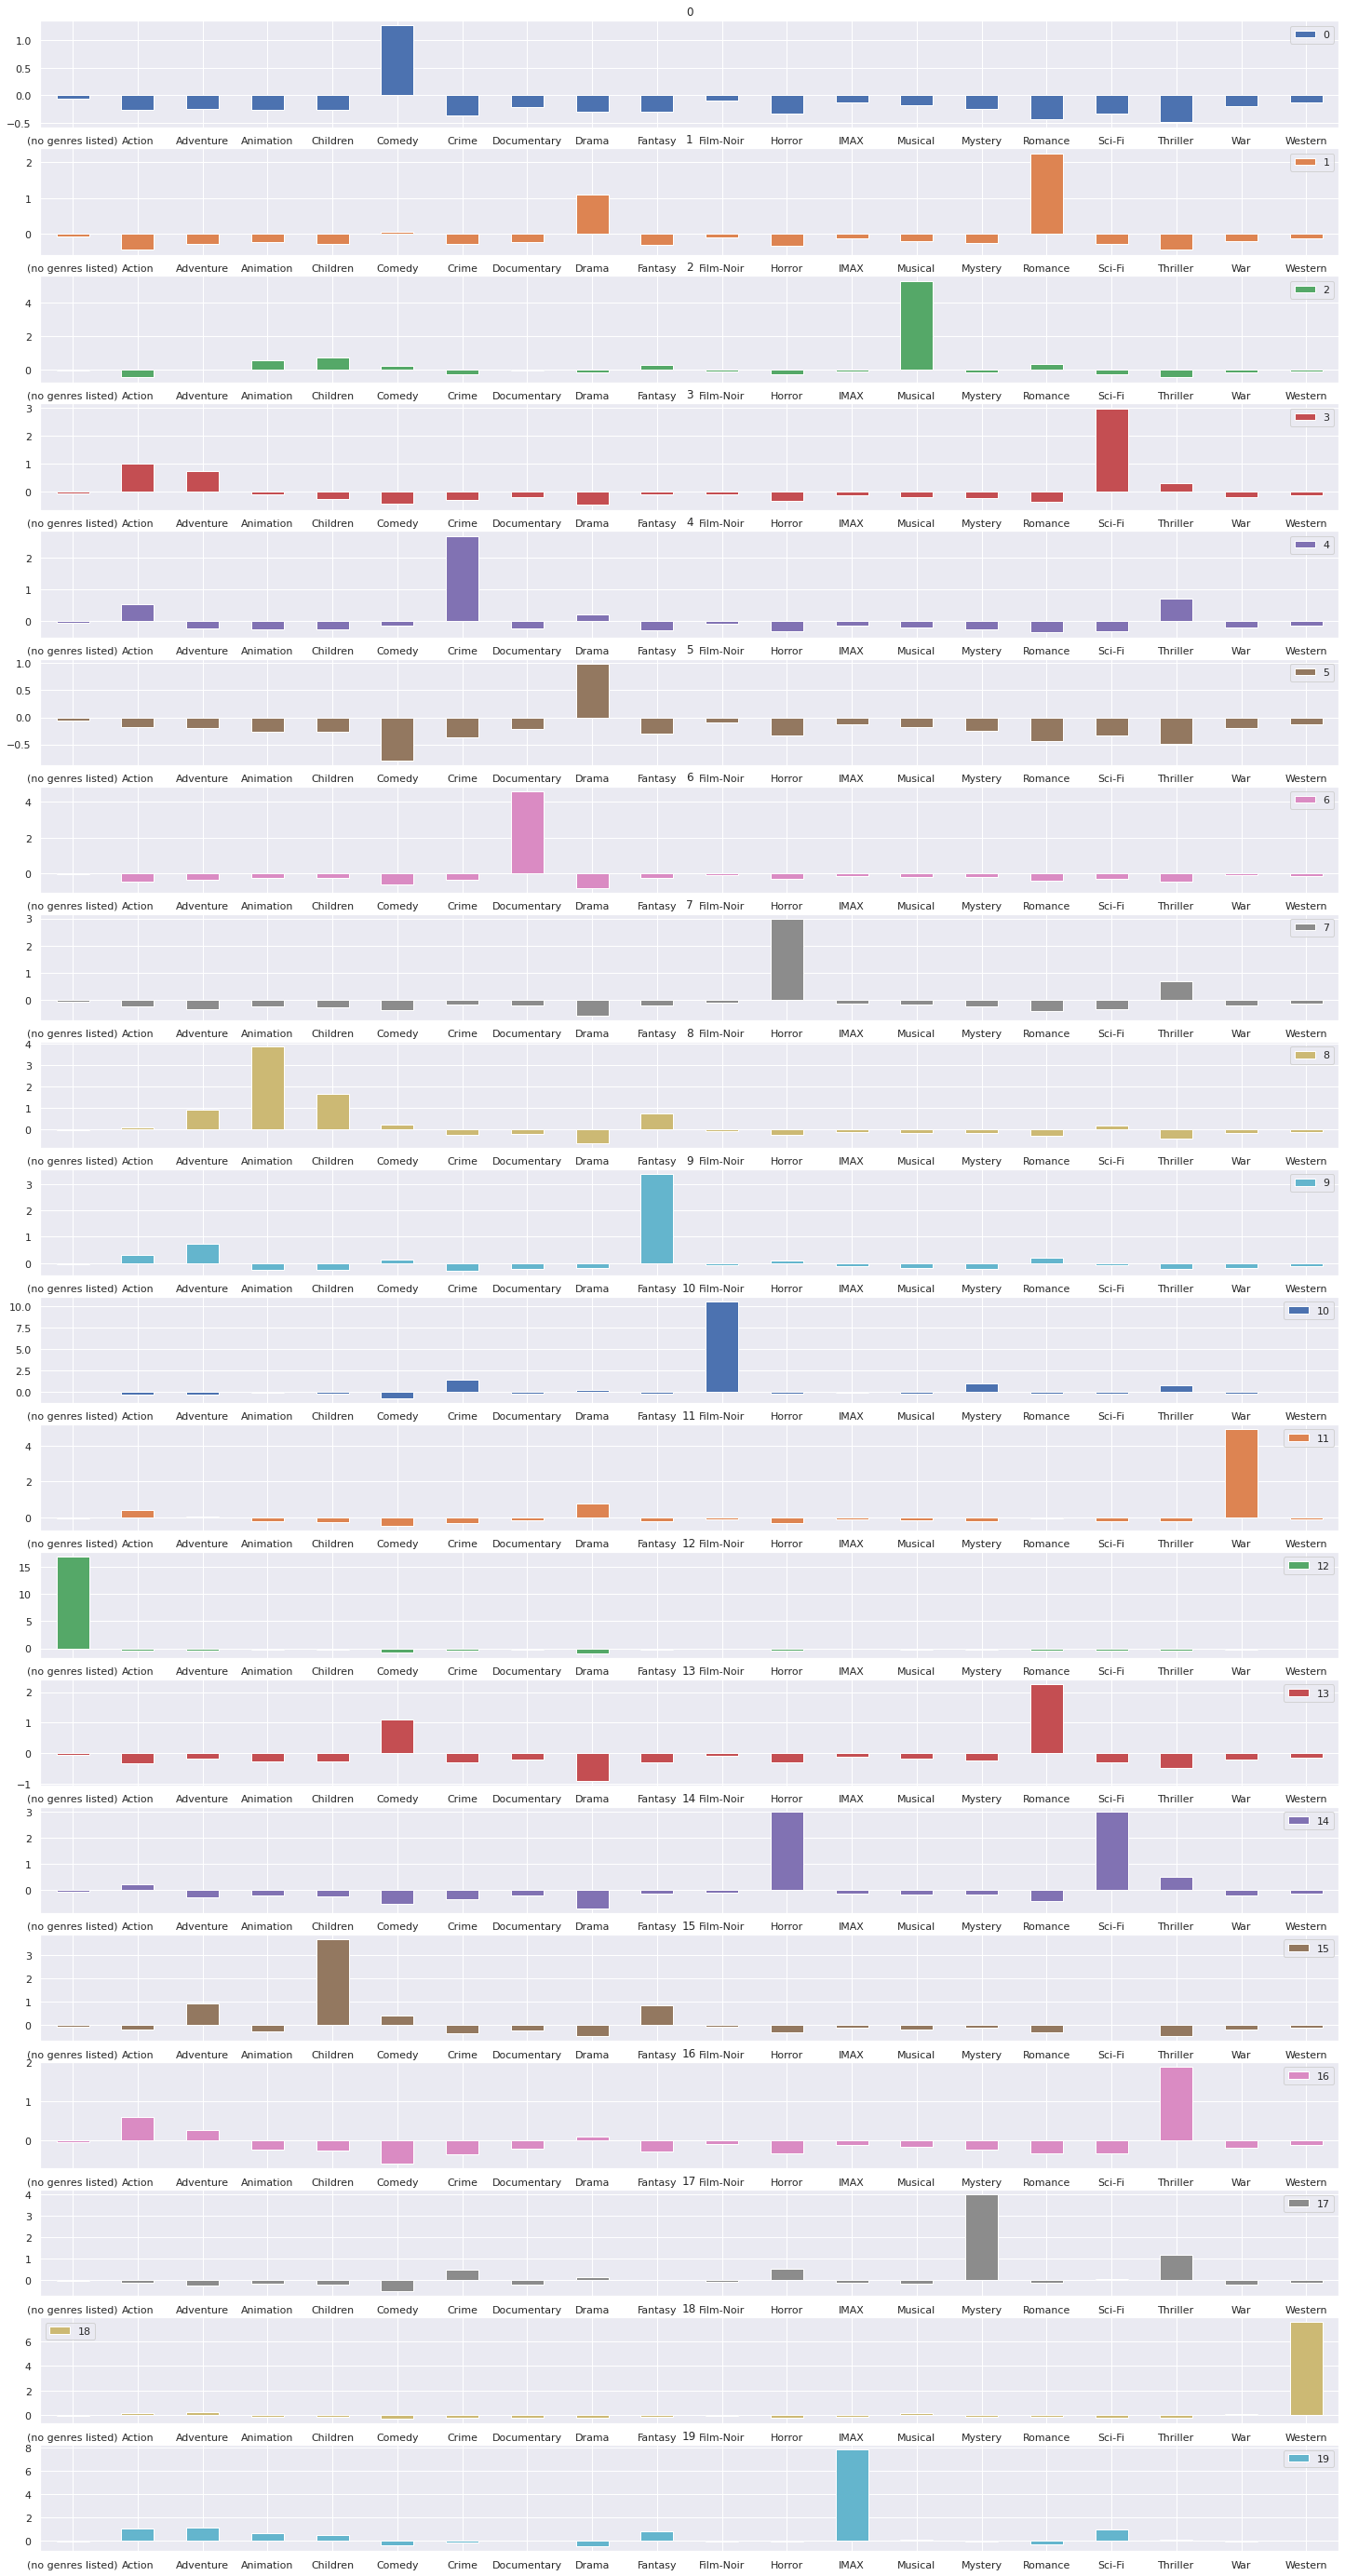

In [11]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

# cria dataframe com dados dos cluster_centers e as colunas sendo os generos dos filmes
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

# subplots cria graficos para cada cluster
# sharex evita que o a legenda do eixo x seja compartilhada entre os plots
# rot = 0 rotaciona a legenda para o eixo y
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [12]:
# filtra filmes do grupo 2
dados_dos_filmes[modelo.labels_ == 2].sample(10)

,filme_id,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3936,5537,Satin Rouge (2002),0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
780,1022,Cinderella (1950),0,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1411,1932,"Great Ziegfeld, The (1936)",0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5506,26422,Hair (1979),0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3549,4857,Fiddler on the Roof (1971),0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6463,52579,"Vie en Rose, La (Môme, La) (2007)",0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8254,104875,"History of Future Folk, The (2012)",0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3451,4708,Marat/Sade (1966),0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
719,938,Gigi (1958),0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4634,6912,You'll Never Get Rich (1941),0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [13]:
# Qual o numero de clusters devemos escolher?
# kmeans utiliza o calculo do erro médio quadrado, ou mean squarred error (MSE)
# com mais clusters, menor é o erro, mas a distancia entre os centroides é menor e podemos ter mais de um cluster separando o mesmo grupo de filmes
# quanto menos clusters, maior o erro pois a distancia dos pontos para o centroide é muito alta
# entao devemos achar o MELHOR erro
def kmeans(numero_clusters, generos):
    modelo = KMeans(n_clusters = numero_clusters)
    modelo.fit(generos)
    # inertia = erro médio ao quadrado
    return [numero_clusters, modelo.inertia_]
kmeans(20, generos_escalados)

[20, 55152.30783672205]

In [17]:
# vamos fazer o teste de qual é o melhor numero de clusters para gerar o melhor erro
# cria uma lista para cada numero de cluster com seu respectivo erro
resultado = [kmeans(numero_clusters, generos_escalados) for numero_clusters in range (1, 41)]
resultado.head()

AttributeError: 'list' object has no attribute 'head'

In [15]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179528.215258
2,3,166226.328654
3,4,157313.053274
4,5,146407.750089
5,6,138241.016585
6,7,127989.815026
7,8,120295.942745
8,9,110324.268203
9,10,103659.266489


<AxesSubplot:>

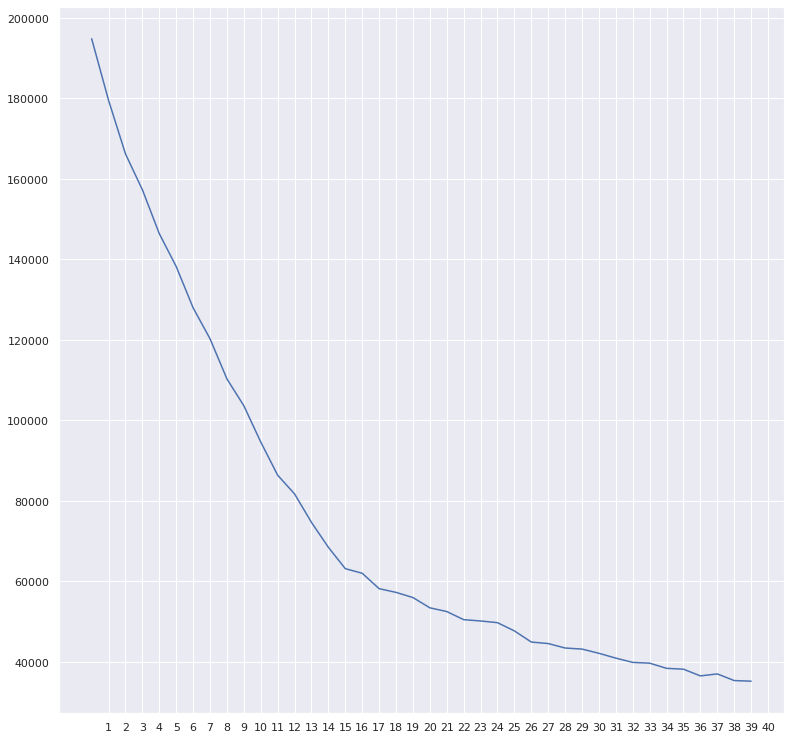

In [16]:
resultado.inertia.plot(xticks=resultado.grupos)
# para a analise do grafico abaixo, usamos o "elbow method" para selecionar o otimo numero de clusters (k)
# o metodo diz que o melhor K é o ponto de quebra do gráfico
# referencia: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>], dtype=object)

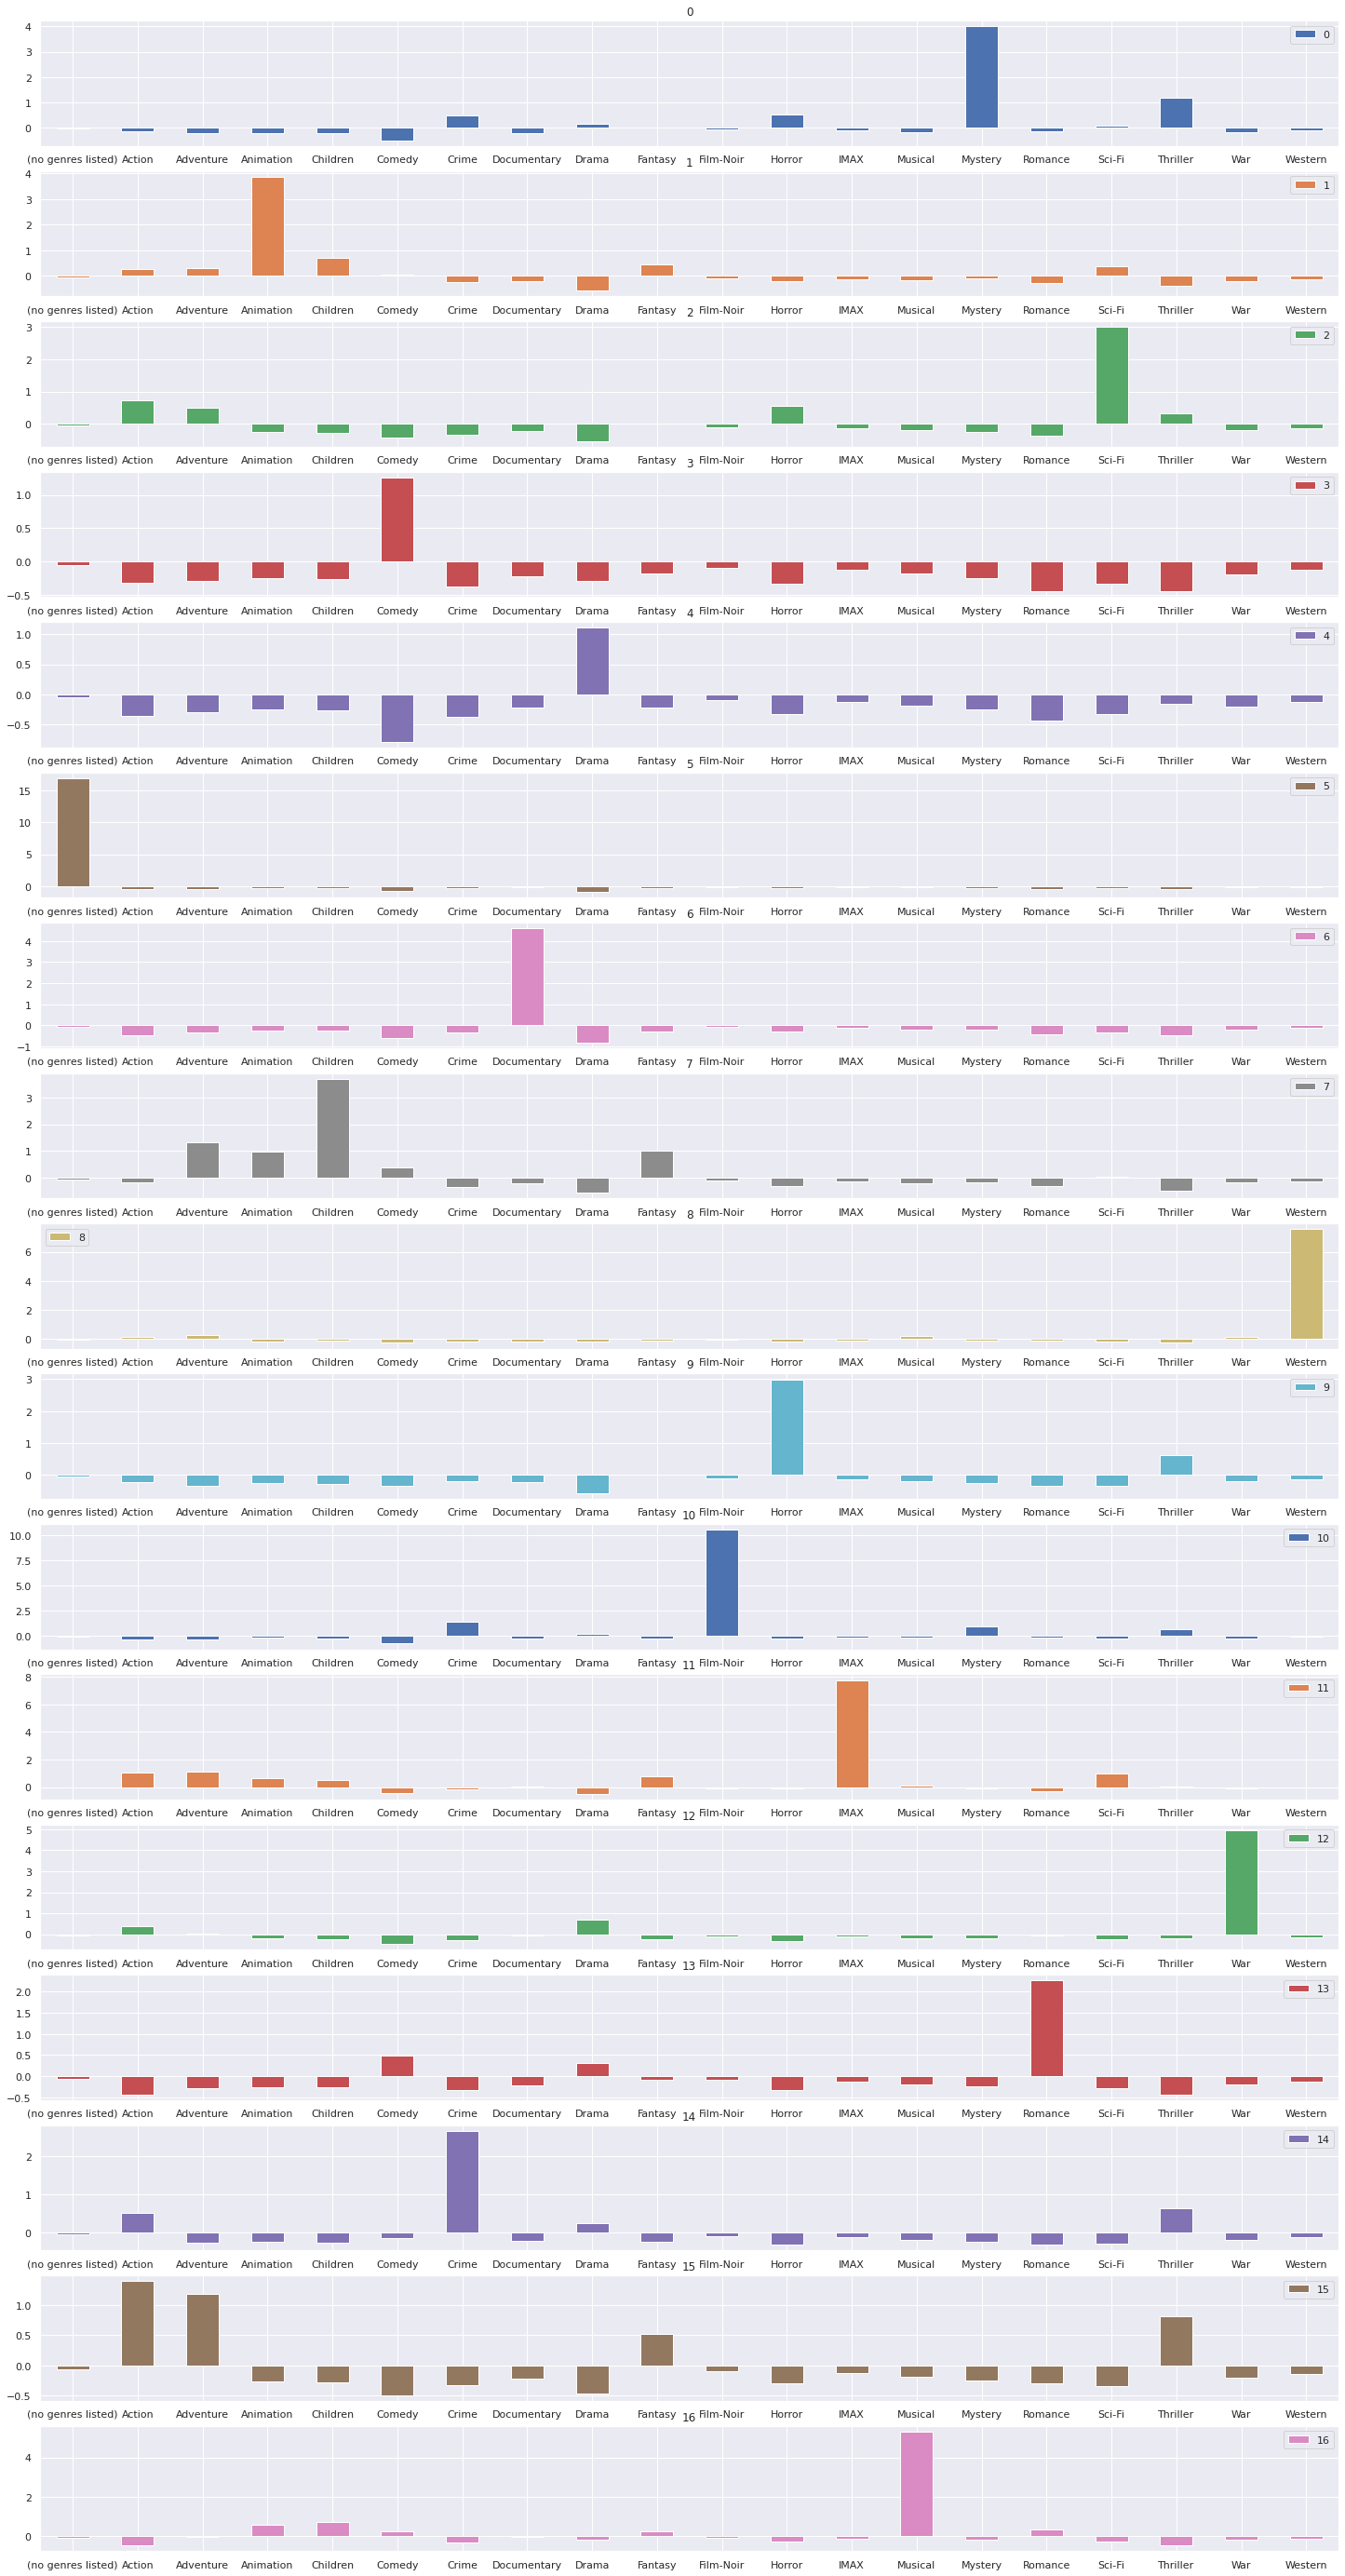

In [18]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [19]:
# agrupamento hierárquico de clusters
# o algoritmo monta uma árvore onde nos níveis mais altos, são os clusters mais distantes uns dos outros
# dependendo do algoritmo vai montar a arvore top-down ou bottom-up
# https://www.saedsayad.com/clustering_hierarchical.htm
from sklearn.cluster import AgglomerativeClustering
modelo = AgglomerativeClustering(n_clusters=17)
#fit_predict treina e já retorna as labels (grupos)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [20]:
#tsne demora rsrsrs
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  9.096124 , -43.147064 ],
       [-23.059435 ,  20.197866 ],
       [ 19.575306 , -23.45984  ],
       ...,
       [  2.8993235,  16.960327 ],
       [-34.445477 ,   7.8864083],
       [ -6.2480063, -22.681808 ]], dtype=float32)

<AxesSubplot:>

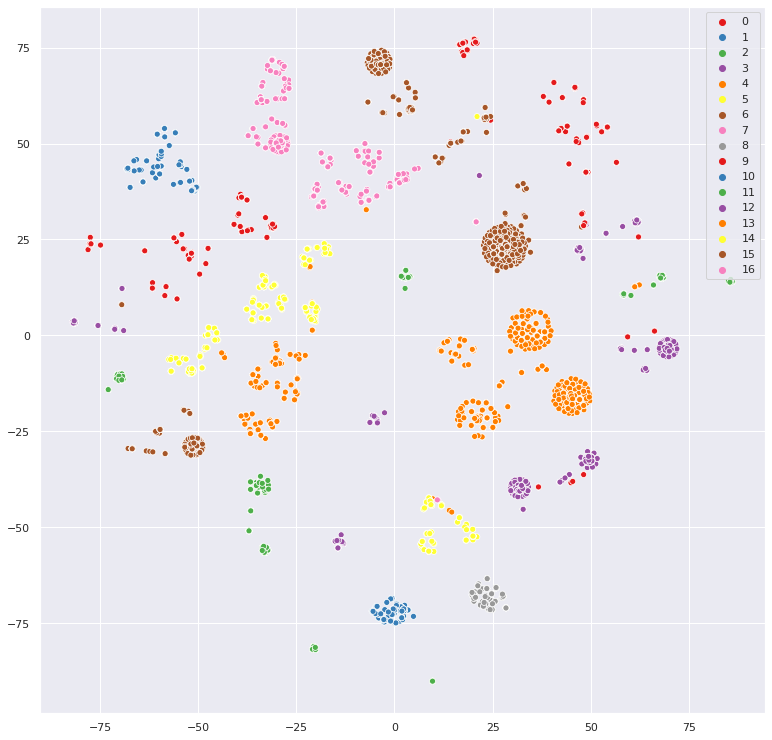

In [22]:
# eixo x e y sendo coluna 0 e 1 respectivamente
# passando a paleta de cores e o numero de grupos, o grafico mostra cada um dos grupos
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos,
               palette=sns.color_palette('Set1', 17))

<AxesSubplot:>

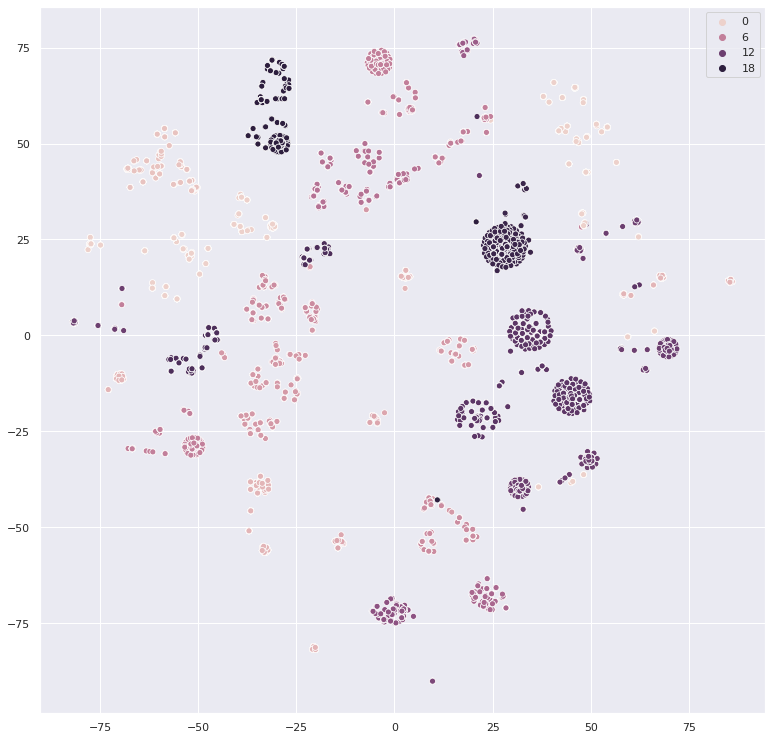

In [24]:
# eixo x e y sendo coluna 0 e 1 respectivamente
# removendo a paleta de cores, podemos ver que o algoritmo gerou 4 nós da arvore de agrupamento hierárquico (0,6,,12,18)
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

In [27]:
#agora iremos plotar um grafico que mostre a arvore do agrupamento hierárquico, chamado Dendrograma
# o agrupamento hierárquico cria uma matriz de distancia entre os generos
from scipy.cluster.hierarchy import dendrogram, linkage

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>], dtype=object)

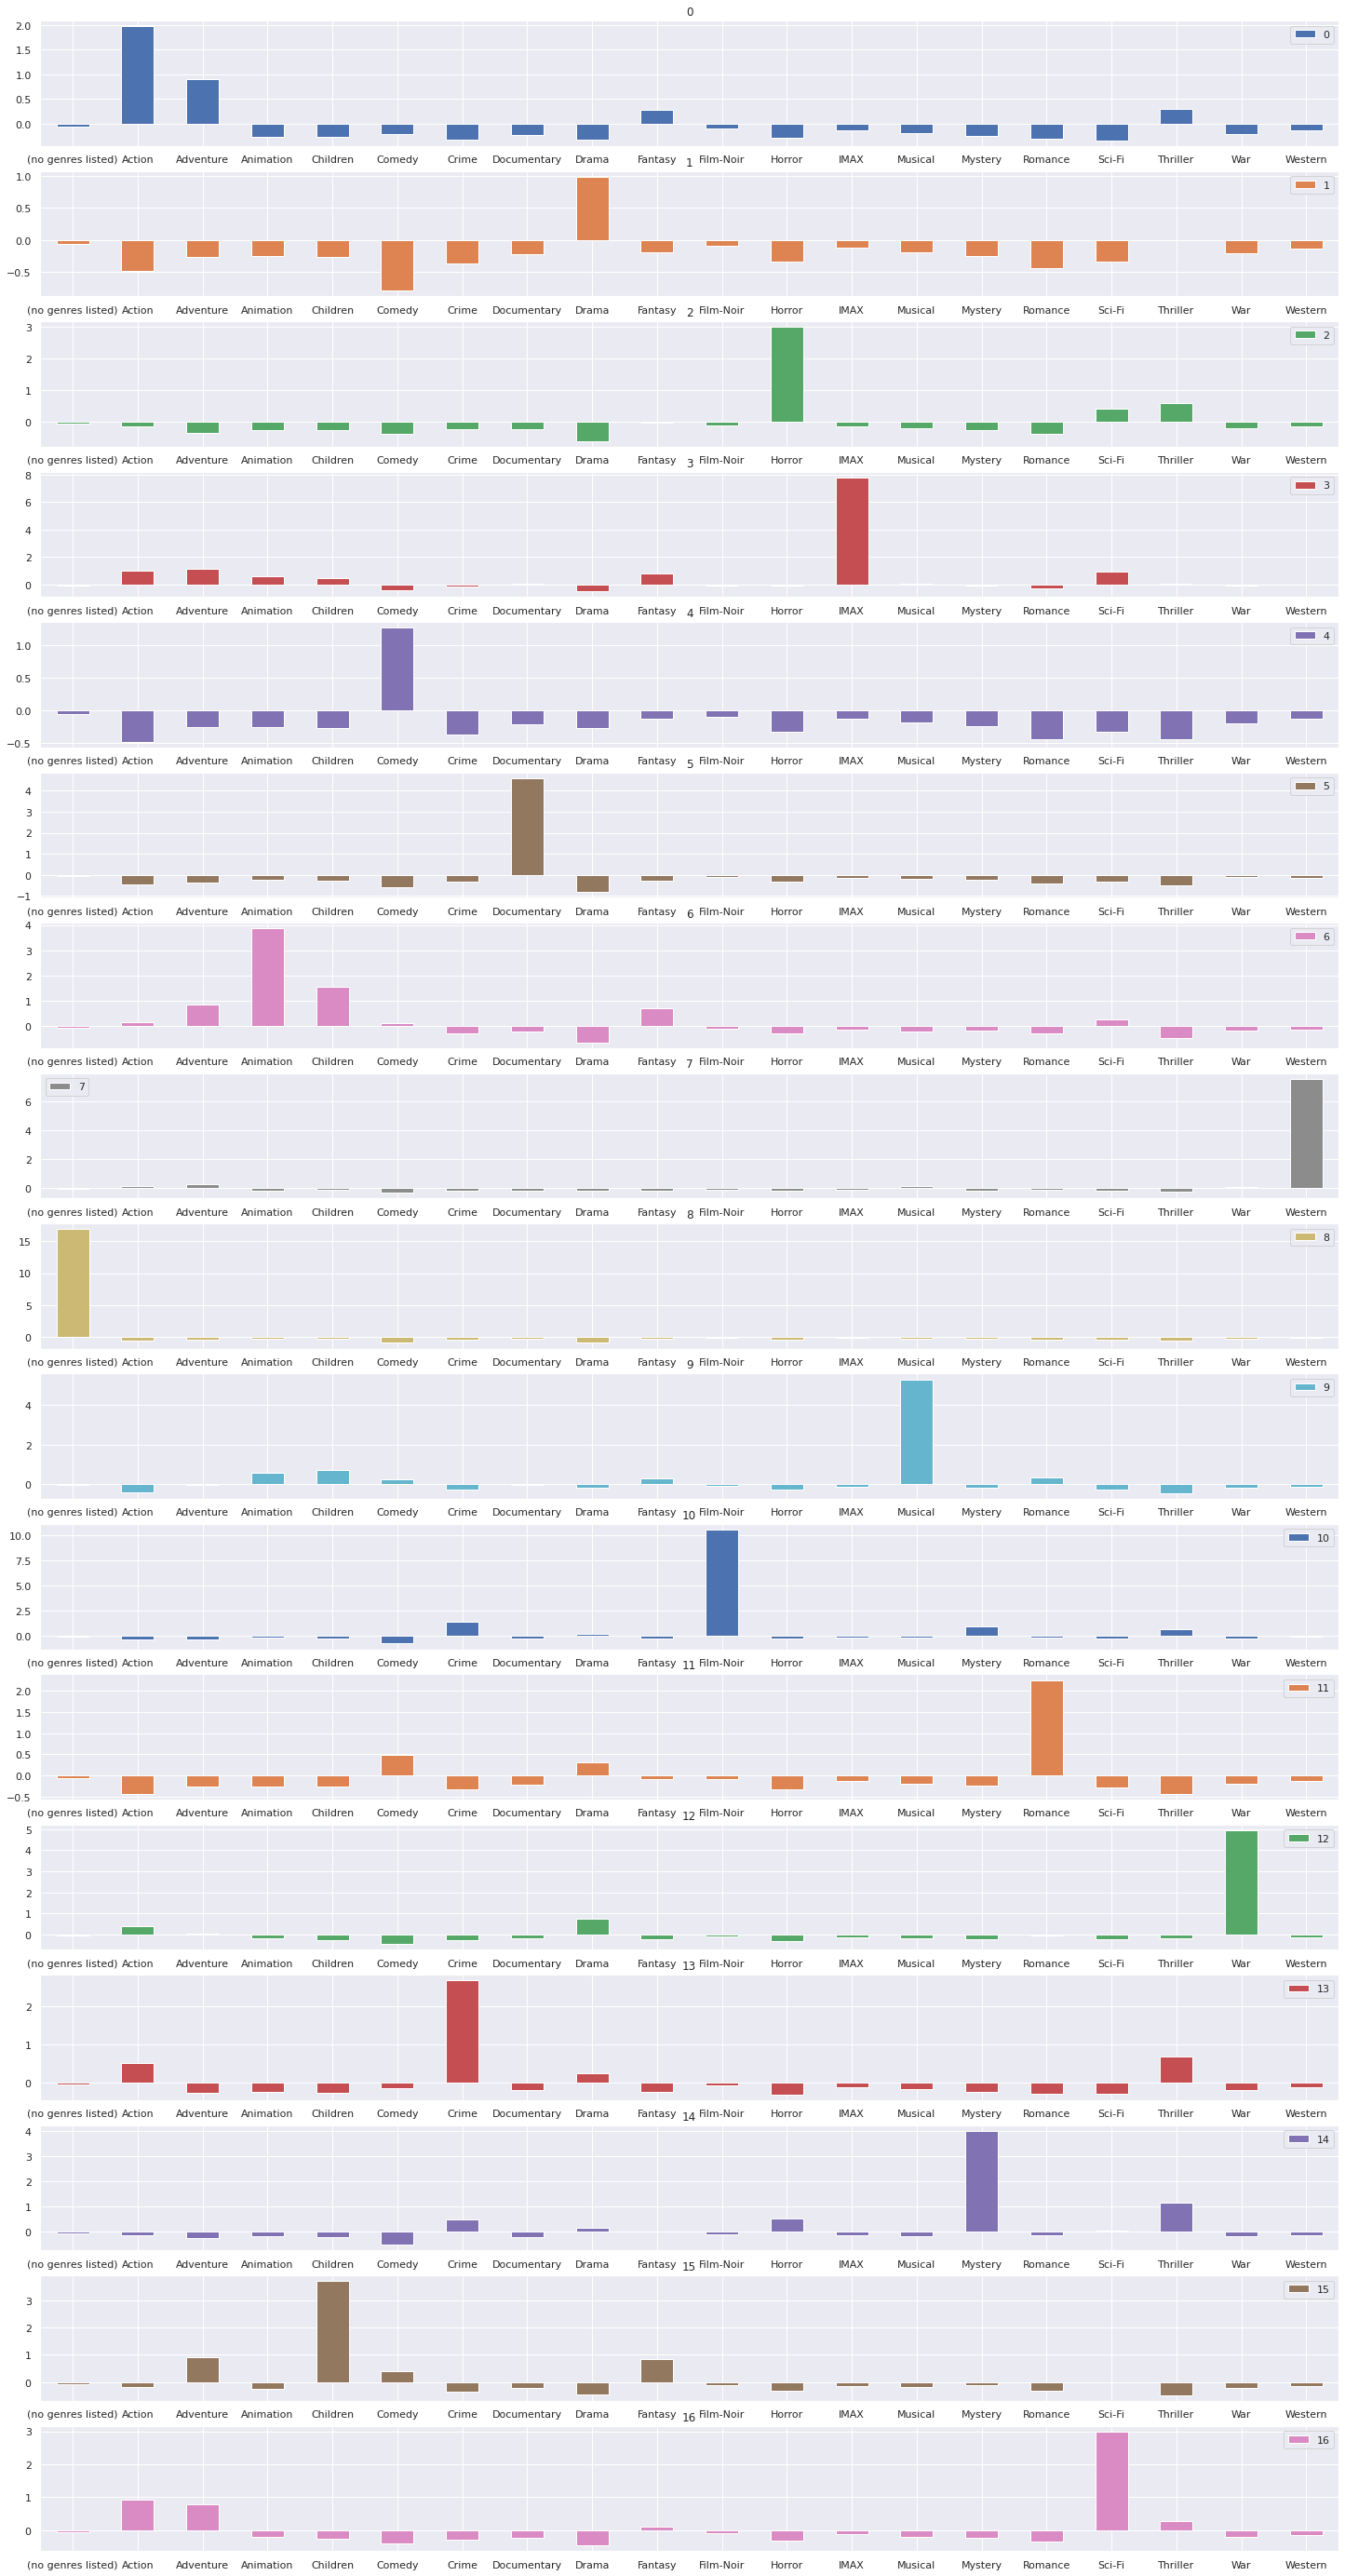

In [28]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [29]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  4.        ,  2.44947301,  2.        ],
       [11.        , 17.        ,  2.87497561,  3.        ],
       [ 0.        , 18.        ,  3.120261  ,  4.        ],
       [13.        , 19.        ,  3.41816283,  5.        ],
       [16.        , 20.        ,  3.49973642,  6.        ],
       [ 2.        , 21.        ,  3.85381619,  7.        ],
       [15.        , 22.        ,  4.37268716,  8.        ],
       [ 6.        , 23.        ,  4.67949719,  9.        ],
       [14.        , 24.        ,  4.70041365, 10.        ],
       [ 5.        , 25.        ,  5.16682076, 11.        ],
       [12.        , 26.        ,  5.27125616, 12.        ],
       [ 9.        , 27.        ,  5.81040031, 13.        ],
       [ 7.        , 28.        ,  7.87941687, 14.        ],
       [ 3.        , 29.        ,  8.20521301, 15.        ],
       [10.        , 30.        , 10.81429229, 16.        ],
       [ 8.        , 31.        , 17.06878602, 17.        ]])

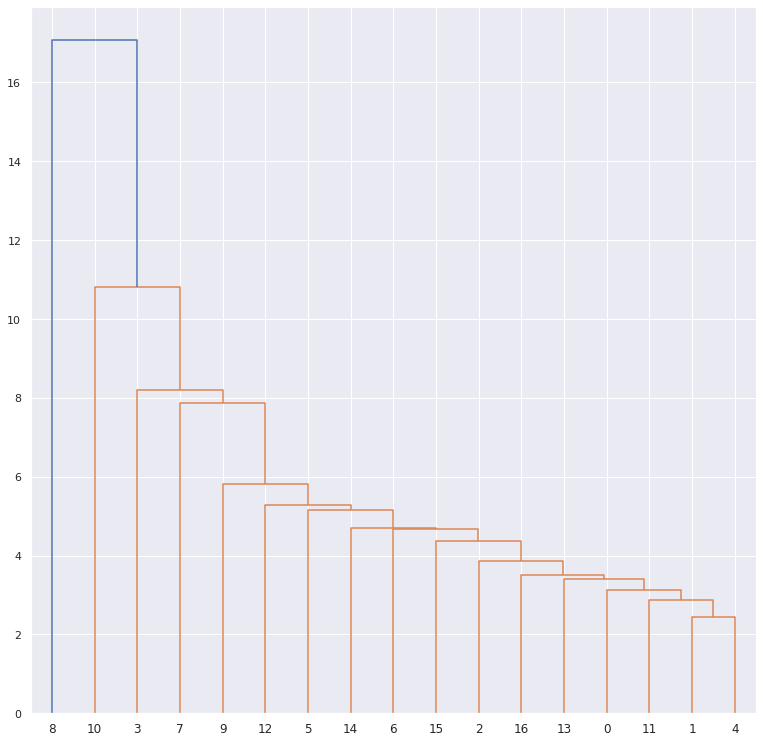

In [30]:
dendrograma = dendrogram(matriz_de_distancia)
# no grafico do dendrograma, podemos ver quais grupos estão próximos uns dos outros pela altura das barras

<AxesSubplot:>

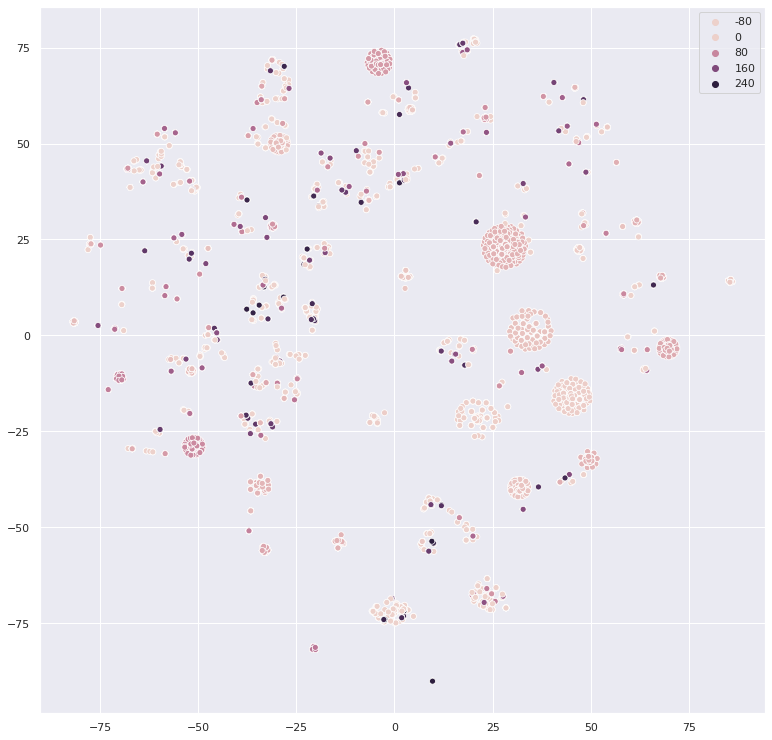

In [35]:
# um outro algoritmo de agrupamento é o agrupamento por densidade (DBSCAN)
# nele podemos identificar pontos mais distantes dos centroides com cores mais diferentes (são os chamados outliers)
# São os pontos que o DBSCAN achou que não pertenciam aos grupos que estavam próximos.
#https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
from sklearn.cluster import DBSCAN
modelo = DBSCAN()
grupos = modelo.fit_predict(generos_escalados)

sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)